In [2]:
import numpy as np
import matplotlib.pyplot as plt    

In [3]:
eta100 = np.load('C:/Users/cleme/Documents/_PYTHON/PHY571/results/eta_it_200_N_100_V_0.03_L_9.8_R_1_avg_20_nb_pts_50_Class1.npy')
v100 = np.load('C:/Users/cleme/Documents/_PYTHON/PHY571/results/v_avg_it_200_N_100_V_0.03_L_9.8_R_1_avg_20_nb_pts_50_Class1.npy')
v_uncertainty100 = np.load('C:/Users/cleme/Documents/_PYTHON/PHY571/results/v_uncertainty_it_200_N_100_V_0.03_L_9.8_R_1_avg_20_nb_pts_50_Class1.npy')

In [4]:
def find_eta_critical(eta, v):
    # Calculer la dérivée seconde
    dy2 = np.gradient(np.gradient(v))

    # Trouver les indices où la dérivée seconde change de signe
    indices_inflexion = np.where(np.diff(np.sign(dy2)))[0]

    # Sélectionner le point d'inflexion comme le point médian entre ces indices
    if len(indices_inflexion) > 0:
        point_inflexion_index = indices_inflexion[len(indices_inflexion) // 2]
        point_inflexion = (eta[point_inflexion_index], v[point_inflexion_index])
        return point_inflexion
    else:
        return None


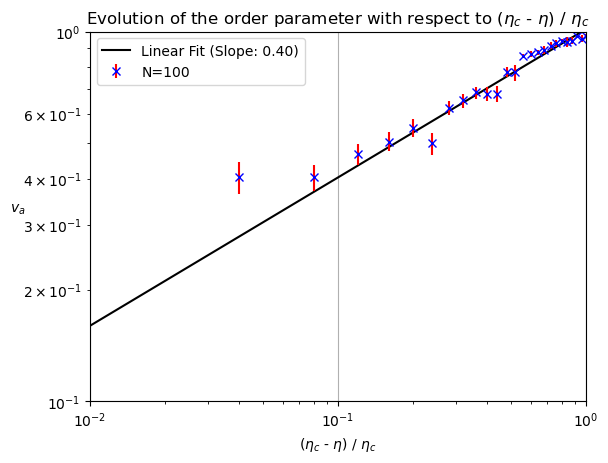

[ 1.    0.96  0.92  0.88  0.84  0.8   0.76  0.72  0.68  0.64  0.6   0.56
  0.52  0.48  0.44  0.4   0.36  0.32  0.28  0.24  0.2   0.16  0.12  0.08
  0.04  0.   -0.04 -0.08 -0.12 -0.16 -0.2  -0.24 -0.28 -0.32 -0.36 -0.4
 -0.44 -0.48 -0.52 -0.56 -0.6  -0.64 -0.68 -0.72 -0.76 -0.8  -0.84 -0.88
 -0.92 -0.96]
[0.97086175 0.95535663 0.97046853 0.94370003 0.93678378 0.94219551
 0.92879221 0.91563956 0.89012952 0.87752911 0.86744118 0.85951286
 0.77478985 0.77754467 0.67745367 0.6792801  0.68398128 0.65099741
 0.62096385 0.49853851 0.54948345 0.50383836 0.46606587 0.40351735
 0.40345588 0.40261451 0.31039273 0.29053819 0.25671776 0.28622296
 0.27744793 0.22985674 0.20726949 0.17411555 0.14433834 0.17813128
 0.14919034 0.16203219 0.12850599 0.15570611 0.12423719 0.12687921
 0.13409515 0.12288699 0.09804093 0.08690424 0.10474921 0.08591423
 0.07290895 0.09708799]


In [8]:
eta_critical100 = find_eta_critical(eta100, v100)[0]
x_values100 = (eta_critical100 - eta100) / eta_critical100

# We perform and plot a linear regression
slope, intercept = np.polyfit(np.log(x_values100[:22]), np.log(v100[:22]), 1)
x_fit = np.logspace(np.log10(0.01), np.log10(1), 100)
y_fit = np.exp(intercept) * x_fit**slope
plt.plot(x_fit, y_fit, color='black', label=f'Linear Fit (Slope: {slope:.2f})')

# We plot the values
plt.errorbar(x_values100, v100, yerr=v_uncertainty100, color='b', ecolor='r', fmt='x',capthick=2, label='N=100')
plt.xlim(0.01, 1)
plt.xscale('log')       
plt.ylim(0.1, 1)
plt.yscale('log')        
plt.xlabel('($\eta_{c}$ - $\eta$) / $\eta_{c}$')
ylabel=plt.ylabel('$v_{a}$')
ylabel.set_rotation(0)

plt.legend()
plt.grid(True)

plt.title('Evolution of the order parameter with respect to ($\eta_{c}$ - $\eta$) / $\eta_{c}$')
plt.show()
print(x_values100)
print(v100)